<a href="https://colab.research.google.com/github/xiaoshan566/OldVideoRepair_PaddleGAN/blob/main/Deep_Exemplar_based_Video_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Exemplar based Video Colorization

This is a reference implementation of our CVPR paper, "Deep Exemplar-based Video Colorization". Should you be making use of our work, please cite our paper.

You can follow the same procedures to try the demo on a local PC with GPUs. The code has been tested on Ubuntu with Python 3.6+ and CUDA installed. 




---


#◢ Verify Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone


In [1]:
!git clone https://github.com/zhangmozhe/Deep-Exemplar-based-Video-Colorization.git

Cloning into 'Deep-Exemplar-based-Video-Colorization'...
remote: Enumerating objects: 2372, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 2372 (delta 48), reused 72 (delta 21), pack-reused 2254
Receiving objects: 100% (2372/2372), 470.05 MiB | 33.64 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Checking out files: 100% (1209/1209), done.


#◢ Set up the environment

In [3]:
# seems to be a colab bug, need to install previous version for pytorch
!pip install torch==1.6.0 torchvision==0.7.0

%cd Deep-Exemplar-based-Video-Colorization/
! pip install -r requirements.txt

[Errno 2] No such file or directory: 'Deep-Exemplar-based-Video-Colorization/'
/content/Deep-Exemplar-based-Video-Colorization


In [4]:
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/colorization_checkpoint.zip
!unzip colorization_checkpoint.zip

--2022-01-11 16:43:25--  https://facevc.blob.core.windows.net/zhanbo/old_photo/colorization_checkpoint.zip
Resolving facevc.blob.core.windows.net (facevc.blob.core.windows.net)... 20.60.68.132
Connecting to facevc.blob.core.windows.net (facevc.blob.core.windows.net)|20.60.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 807580660 (770M) [application/x-zip-compressed]
Saving to: ‘colorization_checkpoint.zip’

colorization_checkp 100%[===================>] 770.17M  35.0MB/s    in 23s     

2022-01-11 16:43:48 (33.3 MB/s) - ‘colorization_checkpoint.zip’ saved [807580660/807580660]

Archive:  colorization_checkpoint.zip
   creating: checkpoints/video_moredata_l1/
  inflating: checkpoints/video_moredata_l1/colornet_iter_76000.pth  
  inflating: checkpoints/video_moredata_l1/discriminator_iter_76000.pth  
  inflating: checkpoints/video_moredata_l1/nonlocal_net_iter_76000.pth  
   creating: data/
  inflating: data/vgg19_conv.pth     
  inflating: data/vgg19_gra

#◢ Test with the sample video

We provide several video clips and corresponding colorization reference under the folder `samples_videos`. 

The clip names can be v04, v05, v07, v23, v26, v32 and v39. For each video clip, we provide 5 reference image for colorization.

For example, you can colorize the video clip v07 according to its refereces by running the following command:

In [5]:
!python test.py --clip_path ./sample_videos/clips/v07 \
               --ref_path ./sample_videos/ref/v07 \
               --output_path ./sample_videos/output

running on GPU [0]
replace all deconv with [nearest + conv]
replace all batchnorm with instancenorm
succesfully load nonlocal model:  checkpoints/video_moredata_l1/nonlocal_net_iter_76000.pth
succesfully load color model:  checkpoints/video_moredata_l1/colornet_iter_76000.pth
processing the folder: ./sample_videos/clips/v07
reference name: ./sample_videos/ref/v07/v07_00.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on 

### Visualize the colorization outputs 

Now we have generated several colorization videos, which locate in the folder `./sample_videos/output/`. In this output folder, one folder contains the input video (e.g., `v07/`), while the following folders (`v07_xx`)contain the output videos.  

In [ ]:
%ls ./sample_videos/output/

v07/         v07_v07_01/  v07_v07_03/  v07_v07_05/
v07_v07_00/  v07_v07_02/  v07_v07_04/


First, we visualize the input video:

In [ ]:
from moviepy.editor import *

## input video
path="./sample_videos/output/v07/video.avi" 
clip=VideoFileClip(path)
clip.ipython_display(width=600)

 99%|█████████▉| 180/181 [00:02<00:00, 88.60it/s]


Here is one output under the folder `./sample_videos/output/v07_xx/video.avi`:

In [ ]:
## output video
path="./sample_videos/output/v07_v07_01/video.avi" 
clip=VideoFileClip(path)
clip.ipython_display(width=600)

 99%|█████████▉| 180/181 [00:00<00:00, 232.48it/s]


#◢ Test your own grayscale video

### upload files

In [8]:
from google.colab import files
import shutil
import os

basepath = "my_test"
upload_path = os.path.join(basepath, "upload")
upload_ref_path = os.path.join(basepath, "upload_ref")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_ref_path):
    shutil.rmtree(upload_ref_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

os.makedirs(upload_ref_path)
os.makedirs(upload_path)
os.makedirs(upload_output_path)

print("now upload the input video")
uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(upload_path, "input"+"."+filename.split(".")[-1]))
    assert(filename.endswith(".avi") or filename.endswith(".mp4"))

now upload the input video


Saving zhangxueliang.mp4 to zhangxueliang.mp4


### Visualize the uploaded video

In [15]:
path=os.path.join(upload_path, "input"+"."+filename.split(".")[-1]) 
clip=VideoFileClip(path)
clip.ipython_display(width=600)

NameError: ignored

### Upload the reference image

now upload the reference image


Saving 04.jpg to 04.jpg


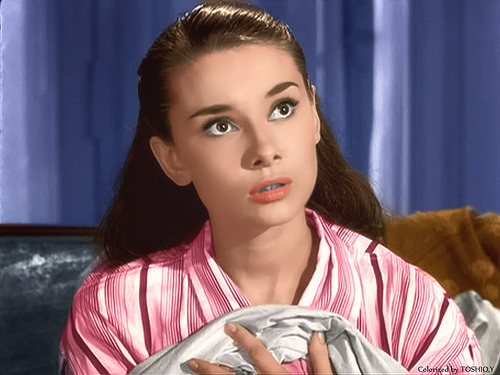

In [ ]:
print("now upload the reference image")
uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(upload_ref_path, "ref"+"."+filename.split(".")[-1]))

from IPython.display import Image
Image(os.path.join(upload_ref_path, "ref"+"."+filename.split(".")[-1]), width=400)

### Extract video frames

In [13]:
import os
import cv2

def FrameCapture(video_path, output_path):
    vidObj = cv2.VideoCapture(video_path)
    count = 0
    success = 1
    while success:
        success, image = vidObj.read()
        if success:
            cv2.imwrite(output_path + "/%d.jpg" % count, image)
            count += 1

path = upload_path
output_path = os.path.join(basepath, "frames")

videos = [video for video in os.listdir(path) if video.endswith(".avi") or video.endswith(".mp4")]
videos.sort()
print(videos)

print("extracting frames from input video")
for idx, video in enumerate(videos):
    frame_path = os.path.join(output_path, video.split(".")[0])
    os.makedirs(frame_path)
    FrameCapture(os.path.join(path, video), frame_path)

['input.mp4']
extracting frames from input video


### Colorize the frames 

In [14]:
!python test.py --clip_path ./my_test/frames/input \
               --ref_path ./my_test/upload_ref \
               --output_path ./my_test/upload_output

running on GPU [0]
replace all deconv with [nearest + conv]
replace all batchnorm with instancenorm
succesfully load nonlocal model:  checkpoints/video_moredata_l1/nonlocal_net_iter_76000.pth
succesfully load color model:  checkpoints/video_moredata_l1/colornet_iter_76000.pth
writing to video ./my_test/upload_output/input/video.avi


### Visualize the colorization output

In [16]:
## input video
path= os.path.join(basepath, "upload_output/input_ref/video.avi")
clip=VideoFileClip(path)
clip.ipython_display(width=600)

NameError: ignored